/Users/maxime/Documents/experiences/milli/MILLIDROP_manip/2017-11-28_dilution_CAA_PvdS-stock2/analysis/growthDerivee/


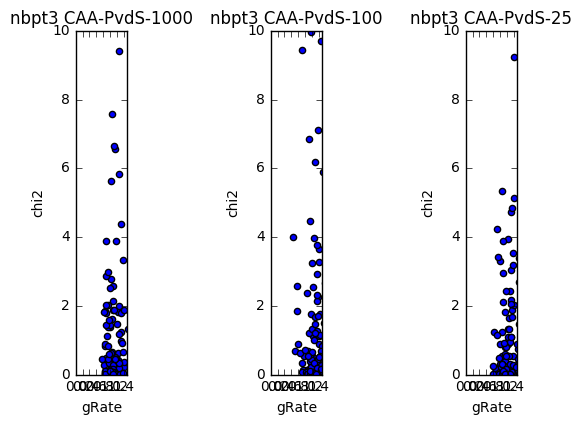

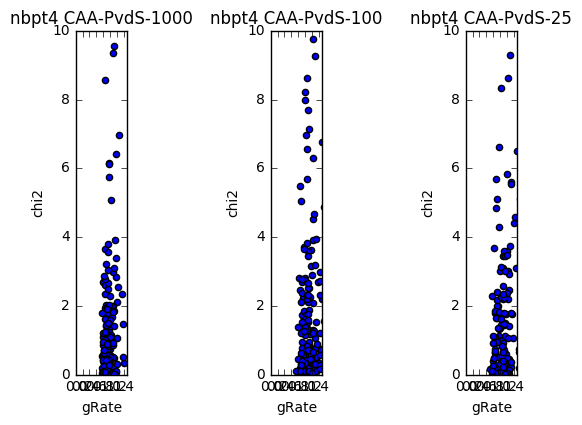

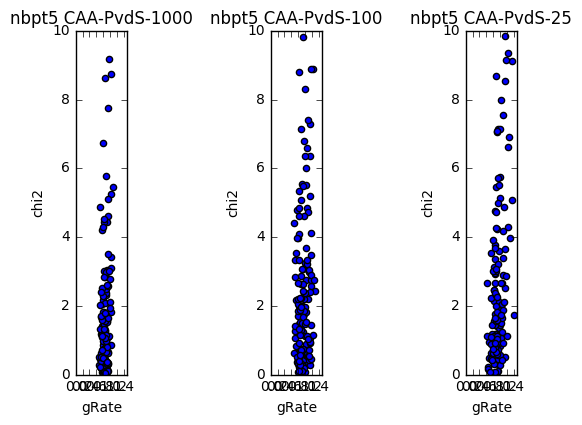

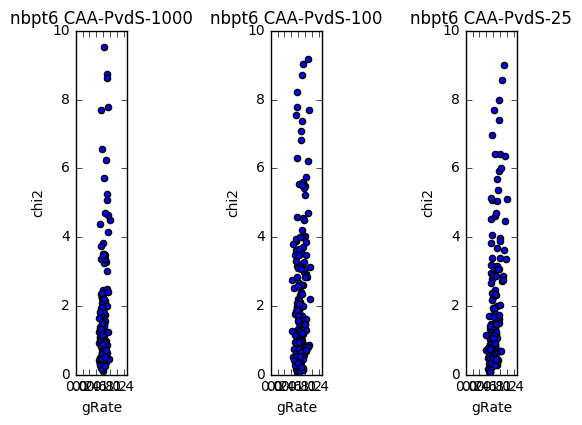

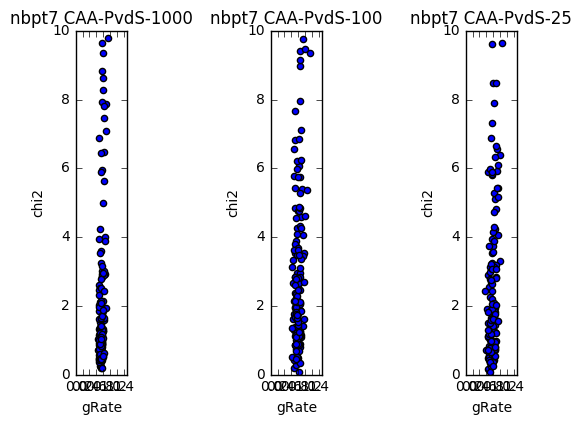

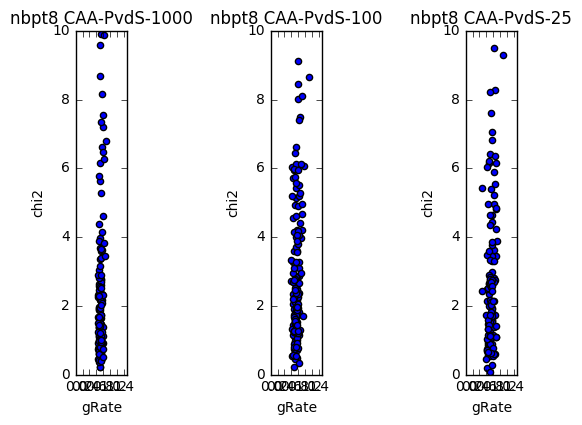

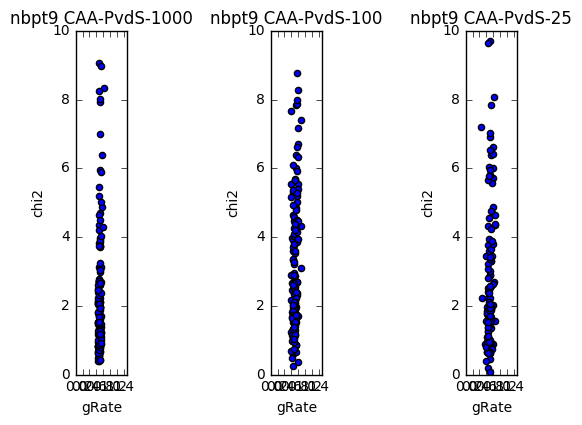

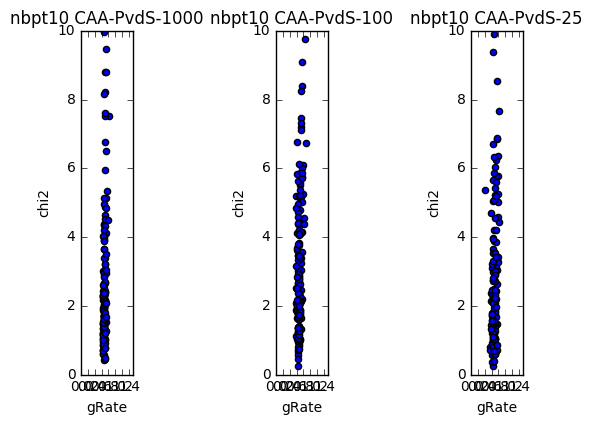

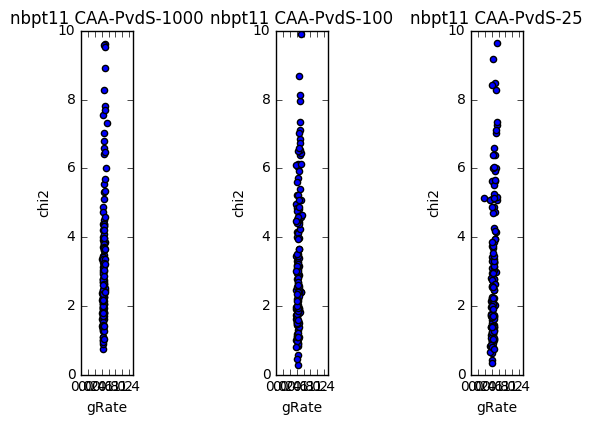

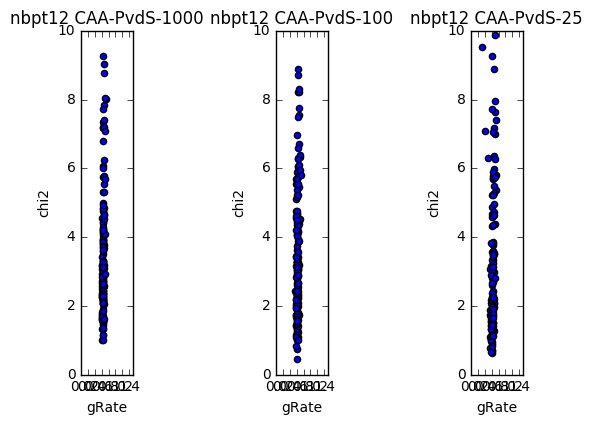

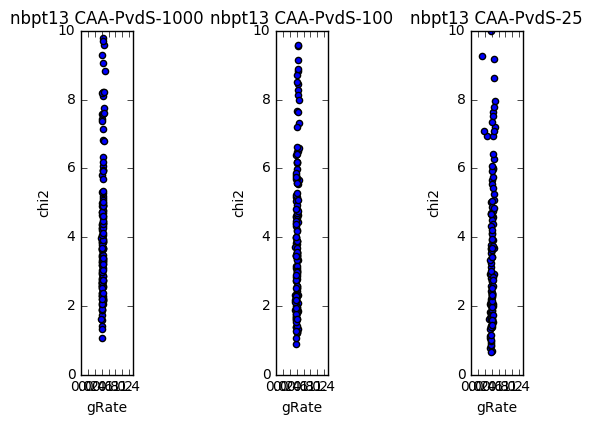

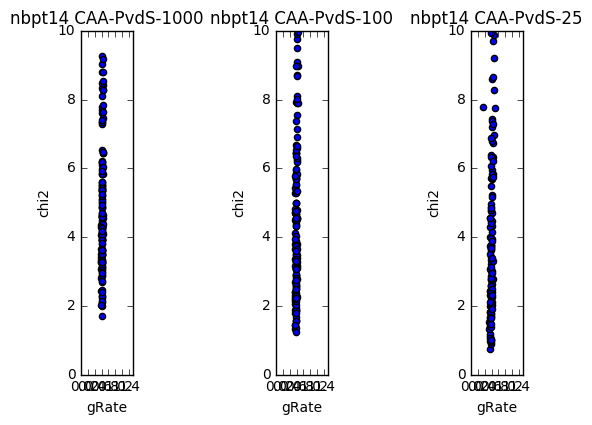

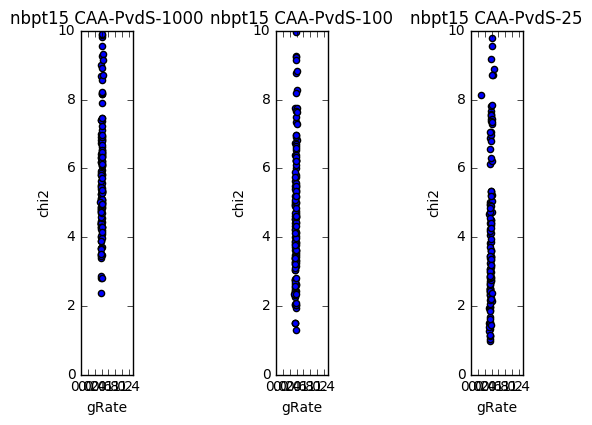

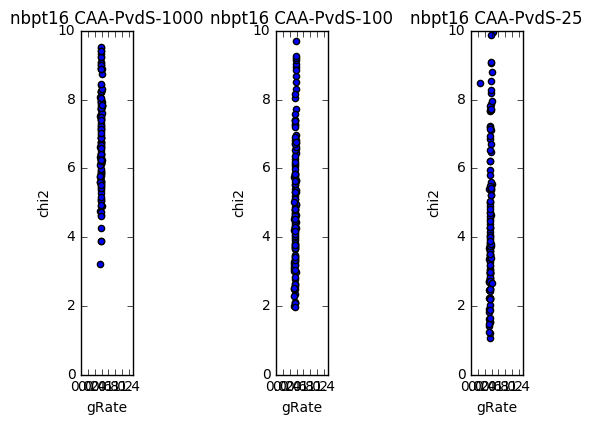

In [84]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.interpolate as si
from pandas import DataFrame as pddf
import bisect

#folder=[None]*4
#folder[0]='/Users/maxime/Documents/experiences/milli/MILLIDROP_manip/2017-11-16_dilution_CAA_WT-stock2/analysis/growthDerivee/'
#folder[1]='/Users/maxime/Documents/experiences/milli/MILLIDROP_manip/2017-11-18_dilution_CAA_WT-stock2/analysis/growthDerivee/'
#folder[2]='/Users/maxime/Documents/experiences/milli/MILLIDROP_manip/2017-11-22_dilution_CAA_WT-stock2/analysis/growthDerivee/'
#folder[3]='/Users/maxime/Documents/experiences/milli/MILLIDROP_manip/2017-11-24_dilution_CAA_WT-stock2/analysis/growthDerivee/'
#label=['CAA-WT-1000', 'CAA-WT-100', 'CAA-WT-25']

label=['CAA-PvdS-1000', 'CAA-PvdS-100', 'CAA-PvdS-25']
folder=[None]*1
folder[0]='/Users/maxime/Documents/experiences/milli/MILLIDROP_manip/2017-11-28_dilution_CAA_PvdS-stock2/analysis/growthDerivee/'


for path in folder:
    print(path)
    gRate = pddf()
    chi2 = pddf()
    for nbpt in range(3,17):
        gRate=pd.read_csv(path+"gRate_nbpt"+str(nbpt))
        chi2=pd.read_csv(path+"chi2_nbpt"+str(nbpt))
        
        fig, ax = plt.subplots(1,3)
        fig.tight_layout()
        for i,l in enumerate(label):
            ax[i].scatter(gRate[l],chi2[l]*10)
            ax[i].set_xlabel("gRate")
            ax[i].set_ylabel("chi2")
            ax[i].set_title("nbpt"+str(nbpt)+" "+l)
            ax[i].set(adjustable='box-forced', aspect=1,xlim=[0,1.5], ylim=[0,10])

        plt.show()
        
    

/Users/maxime/Documents/experiences/milli/MILLIDROP_manip/2017-11-28_dilution_CAA_PvdS-stock2/analysis/growthDerivee/


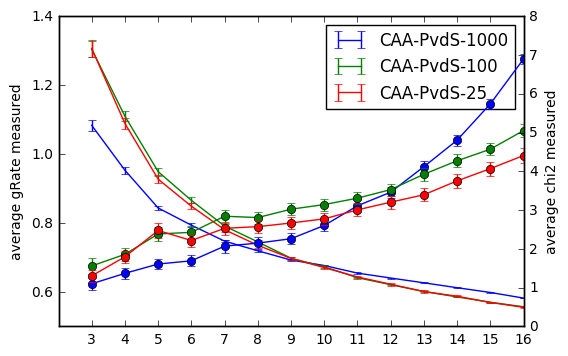

In [85]:
def column(matrix, i):
    return [row[i] for row in matrix]

for path in folder:
    print(path)
    gRate = pddf()
    chi2 = pddf()
    gR=[[] for i in range(17-3)]
    stdgR=[[] for i in range(17-3)]
    chiR=[[] for i in range(17-3)]
    stdchiR=[[] for i in range(17-3)]
    
    for nbpt in range(3,17):
        gRate=pd.read_csv(path+"gRate_nbpt"+str(nbpt))
        chi2=pd.read_csv(path+"chi2_nbpt"+str(nbpt))
        

        for i,l in enumerate(label):
            gR[nbpt-3].append(np.mean(gRate[l]))
            stdgR[nbpt-3].append(np.std(gRate[l])/np.sqrt(len(gRate[l])))
            chiR[nbpt-3].append(np.mean(chi2[l]*10))
            stdchiR[nbpt-3].append(np.std(chi2[l]*10)/np.sqrt(len(chi2[l])))
    
    fig, ax = plt.subplots()
    ax.errorbar(range(3,17),column(gR,0),column(stdgR,0))
    ax.errorbar(range(3,17),column(gR,1),column(stdgR,1))
    ax.errorbar(range(3,17),column(gR,2),column(stdgR,2))
    ax.legend(label)
    plt.ylabel("average gRate measured")
    ax2=ax.twinx()
    ax2.errorbar(range(3,17),column(chiR,0),column(stdchiR,0),marker='o')
    ax2.errorbar(range(3,17),column(chiR,1),column(stdchiR,1),marker='o')
    ax2.errorbar(range(3,17),column(chiR,2),column(stdchiR,2),marker='o')
    plt.xlabel("number of points to fit")
    plt.ylabel("average chi2 measured")
    plt.xticks(range(3,17))
    plt.savefig(path+"gRateVSnbpt.png")
    plt.show()
